# Explicación de Long Short-Term Memory (LSTM)

En este cuaderno, explicaremos cómo funcionan las LSTM, una variante mejorada de las Redes Neuronales Recurrentes (RNN) que aborda problemas como el desvanecimiento de gradientes y las dependencias a largo plazo.

## Objetivos
- Comprender el funcionamiento de las LSTM y su arquitectura interna (celdas de memoria, puertas).
- Explorar cómo las LSTM procesan secuencias de datos, especialmente en tareas de texto.
- Discutir cómo las LSTM mejoran las limitaciones de las RNN estándar.
- Implementar un modelo LSTM en TensorFlow para predecir la siguiente palabra en una secuencia.

## 1. Introducción a las LSTM
Las Long Short-Term Memory (LSTM) son un tipo de RNN diseñadas para manejar dependencias a largo plazo de manera más efectiva que las RNN estándar.

### Arquitectura de las LSTM
Las LSTM incluyen tres puertas clave:
- **Puerta de Olvido**: Decide cuánta información del estado anterior debe ser descartada.
- **Puerta de Entrada**: Decide cuánta información nueva debe ser almacenada en la celda de memoria.
- **Puerta de Salida**: Decide qué parte del estado interno debe ser salida como información al siguiente paso.

![Arquitectura LSTM](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/The_LSTM_cell.png/1200px-The_LSTM_cell.png)

Este diseño permite que las LSTM conserven información relevante durante periodos más largos en secuencias, mitigando el problema del desvanecimiento de gradientes presente en las RNN simples.

## 2. Procesamiento de Secuencias con LSTM
Ahora implementaremos un modelo LSTM para procesar secuencias de texto y predecir la siguiente palabra en una oración.


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
import numpy as np

# Datos de ejemplo: Secuencia de texto
sentences = ["el gato juega", "el perro corre", "la luna brilla"]
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
max_sequence_len = max([len(x) for x in sequences])
sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_len)

# Dividir en características (X) y etiquetas (y)
X, y = sequences[:, :-1], sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=len(tokenizer.word_index)+1)

# Crear el modelo LSTM
model_lstm = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_sequence_len-1),
    LSTM(32),
    Dense(len(tokenizer.word_index)+1, activation='softmax')
])

# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del Modelo LSTM
Entrenamos el modelo LSTM con las secuencias de texto anteriores para predecir la siguiente palabra.

In [10]:
# Entrenar el modelo LSTM
history_lstm = model_lstm.fit(X, y, epochs=300, verbose=1)


Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 2.1947
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3333 - loss: 2.1914
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3333 - loss: 2.1881
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3333 - loss: 2.1848
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3333 - loss: 2.1815
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3333 - loss: 2.1781
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3333 - loss: 2.1747
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6667 - loss: 2.1713
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6667 - loss: 2.1678
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 2.1643
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6667 - loss: 2.1607
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6667 - loss

### Visualización del rendimiento del modelo LSTM
Mostramos las curvas de pérdida y precisión durante el entrenamiento del modelo.

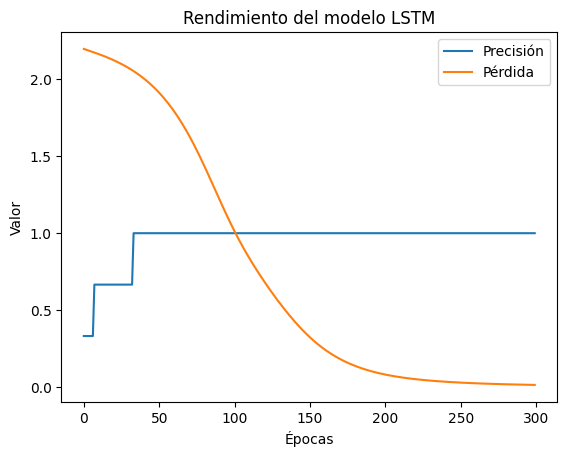

In [11]:
import matplotlib.pyplot as plt
# Graficar la precisión y la pérdida
plt.plot(history_lstm.history['accuracy'], label='Precisión')
plt.plot(history_lstm.history['loss'], label='Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Rendimiento del modelo LSTM')
plt.legend()
plt.show()

In [12]:
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 2, 8)                │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,853 (65.84 KB)

 Trainable params: 5,617 (21.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,236 (43.89 KB)

## 3. Comparación entre LSTM y RNN
Las LSTM tienen ventajas significativas sobre las RNN estándar cuando se trata de manejar dependencias a largo plazo en las secuencias. La arquitectura interna de las LSTM les permite recordar información durante más tiempo, lo que es crucial en muchas tareas de procesamiento de lenguaje natural (NLP).

En comparación, las RNN simples tienden a olvidar la información después de pocos pasos, lo que afecta su capacidad para manejar secuencias largas de manera efectiva.

## 4. Generación de Texto con el Modelo LSTM
Después de entrenar el modelo, podemos usarlo para generar nuevas palabras basadas en un texto inicial.

In [13]:
# Función para generar texto basado en el modelo LSTM entrenado
def generar_texto_lstm(model, tokenizer, seed_text, max_sequence_len, n_words):
    for _ in range(n_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Generar texto basado en un texto inicial
seed_text = "el gato"
generated_text = generar_texto_lstm(model_lstm, tokenizer, seed_text, max_sequence_len, 5)
print(generated_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
el gato juega juega juega juega juega


## Conclusión
Las LSTM son una poderosa herramienta para manejar dependencias a largo plazo en secuencias de datos. Son especialmente útiles en tareas de procesamiento de lenguaje natural donde es crucial recordar el contexto de palabras anteriores. En este cuaderno, hemos implementado un modelo LSTM para predecir palabras y generar texto basado en las secuencias entrenadas.